# 02_tml_baseline

We will use the train/test data generated from *00_create_dataset.ipynb* and use basic machine learning models to generate a baseline reference of model performance on our data. We will then decide on how to improve the various models after this

In [ ]:
''' data and math '''
import pandas as pd
import numpy as np

''' plotting images '''
from matplotlib import pyplot as plt
%matplotlib inline

''' traversing directories '''
import os
from pathlib import Path

''' utilities '''
from tqdm import tqdm

''' metrics '''
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
''' used to reference the root directory, for directory traversal ''' 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
mount_dir = '/content/gdrive'
root_dir = Path('/content/gdrive/My Drive/it3011_project')

Mounted at /content/gdrive


# Loading data

In [ ]:
# load data
train = pd.read_csv(root_dir/"data/train.csv")
test = pd.read_csv(root_dir/"data/test.csv")
print("data loaded")

data loaded


In [ ]:
# check shape
print(train.shape)
print(test.shape)

(280145, 138)
(120504, 138)


In [ ]:
# create train/test sets
features = [feature for feature in test.keys() if "feature" in feature]
x_train = train.loc[:, features].values
y_train = train.loc[:,['action']].values.flatten()
x_test = test.loc[:, features].values
y_test = test.loc[:,['action']].values.flatten()
print("train/test set created")

train/test set created


In [ ]:
# scaling data to make it easier for models to train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# test set scaled on the same scaler as train, because models are fitted on the train distributions and not test distributions
x_test = scaler.transform(x_test)

# Helper functions

In [ ]:
# constants
SEED = 42

In [ ]:
# create the utility score, which takes in the prediction value and the ground truth action and generates a score
# link: https://www.kaggle.com/c/jane-street-market-prediction/overview/evaluation

# data: original train/test data    action: the y-value. can either be y_pred or original values too, if we want the max score attainable
def utility_score(data, action): 
  dates_set = set(data.date.values)
  dates = data.loc[:, ['date']].values.flatten()
  weights = data.loc[:, ['weight']].values.flatten()
  resps = data.loc[:, ['resp']].values.flatten()
  actions = action.flatten()

  i = len(dates_set)
  p_i = []

  for date in dates_set:
    indices = np.where(dates == date)[0]
    p_i_temp = 0
    for j in indices:
      p_i_temp = p_i_temp + weights[j] * resps[j] * actions[j]
    p_i.append(p_i_temp)
  
  p_i_squared = [p_i1*p_i2 for p_i1,p_i2 in zip(p_i,p_i)]
  t = ( sum(p_i) / np.sqrt(sum(p_i_squared)) ) * np.sqrt(250/i)
  u = min(max(t, 0), 6) * sum(p_i)

  return u

def max_train_utility_score(data=train, action=y_train):
  return utility_score(data, action)

def max_test_utility_score(data=test, action=y_test):
  return utility_score(data, action)

In [ ]:
def model_scores(model, test=test, x_test=x_test, y_test=y_test):
  y_pred = model.predict(x_test) 

  print("Utility score: ", utility_score(test, y_pred))
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  
  print("Confusion matrix")
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
  plt.show()  

  print("AUC_ROC")
  logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Logistic regression model

In [ ]:
# import model
from sklearn.linear_model import LogisticRegression

# settings to vary
solvers = ['liblinear', 'sag', 'saga', 'lbfgs']
iterations = [100, 1000, 10000]



Logistic Regression model: solver = liblinear, iteration = 100
Utility score:  302.84469880205387
Accuracy:  0.5201736041957113
Confusion matrix


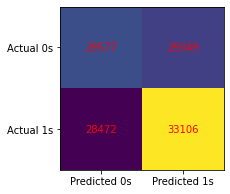

AUC_ROC


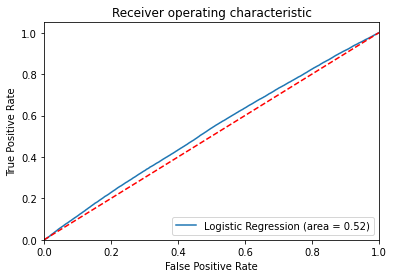



Logistic Regression model: solver = liblinear, iteration = 1000
Utility score:  302.84469880205387
Accuracy:  0.5201736041957113
Confusion matrix


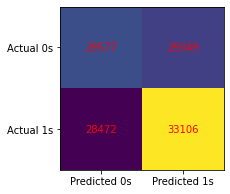

AUC_ROC


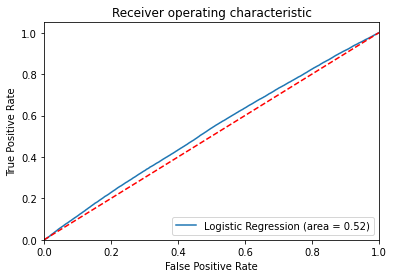



Logistic Regression model: solver = liblinear, iteration = 10000
Utility score:  302.84469880205387
Accuracy:  0.5201736041957113
Confusion matrix


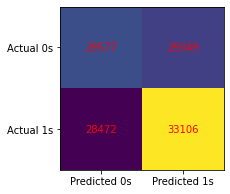

AUC_ROC


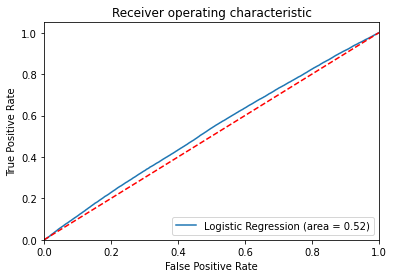



Logistic Regression model: solver = sag, iteration = 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Utility score:  357.9717561088682
Accuracy:  0.5204474540264223
Confusion matrix


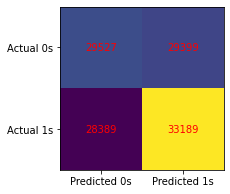

AUC_ROC


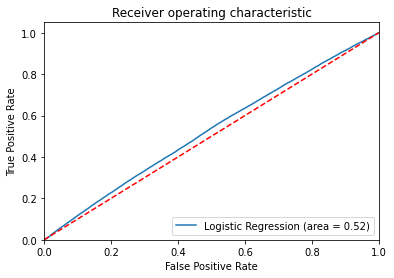



Logistic Regression model: solver = sag, iteration = 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Utility score:  295.90748857839736
Accuracy:  0.5201819026754299
Confusion matrix


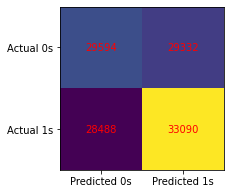

AUC_ROC


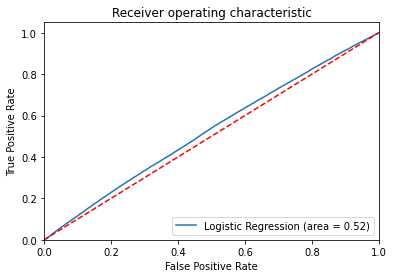



Logistic Regression model: solver = sag, iteration = 10000
Utility score:  291.8890113408358
Accuracy:  0.5201238133174002
Confusion matrix


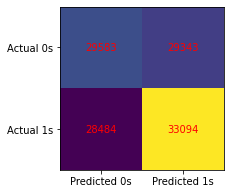

AUC_ROC


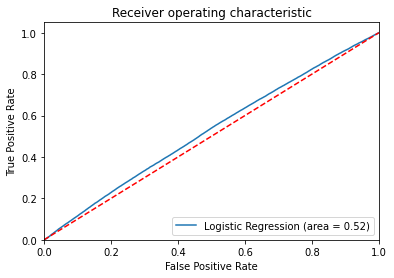



Logistic Regression model: solver = saga, iteration = 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Utility score:  365.09801430332277
Accuracy:  0.5202731859523335
Confusion matrix


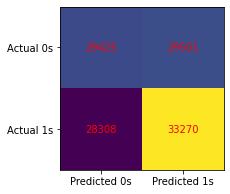

AUC_ROC


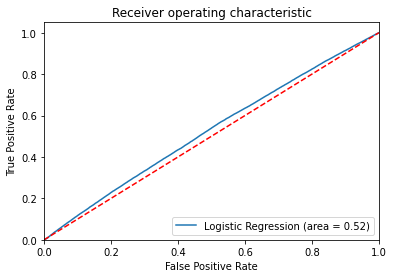



Logistic Regression model: solver = saga, iteration = 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Utility score:  287.3952921256599
Accuracy:  0.5200906193985262
Confusion matrix


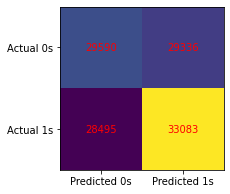

AUC_ROC


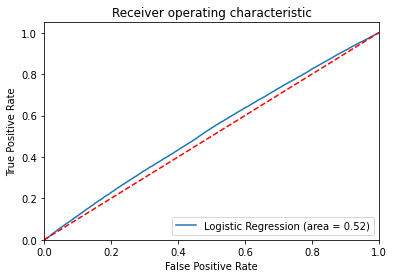



Logistic Regression model: solver = saga, iteration = 10000
Utility score:  294.04234134128274
Accuracy:  0.5201819026754299
Confusion matrix


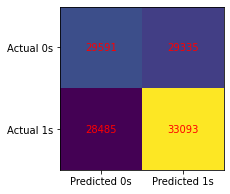

AUC_ROC


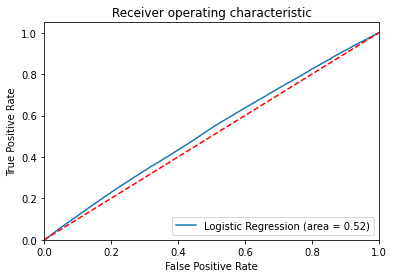



Logistic Regression model: solver = lbfgs, iteration = 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Utility score:  311.9997731290663
Accuracy:  0.5198831574055633
Confusion matrix


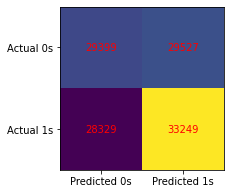

AUC_ROC


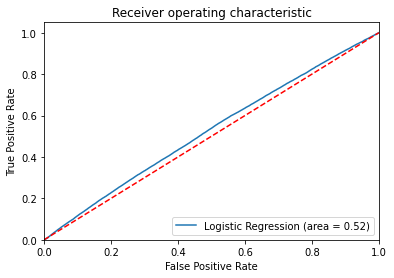



Logistic Regression model: solver = lbfgs, iteration = 1000
Utility score:  282.8605194307201
Accuracy:  0.5198997543650004
Confusion matrix


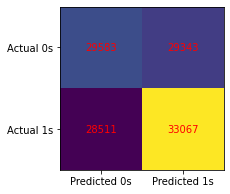

AUC_ROC


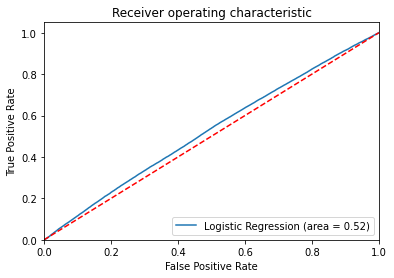



Logistic Regression model: solver = lbfgs, iteration = 10000
Utility score:  282.8605194307201
Accuracy:  0.5198997543650004
Confusion matrix


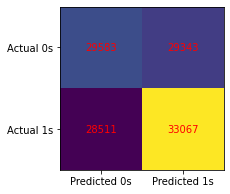

AUC_ROC


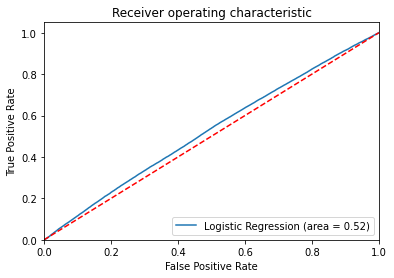

In [ ]:
# iterate over settings for the model
for solver in solvers:
  for iteration in iterations:
    print(f"\n\nLogistic Regression model: solver = {solver}, iteration = {iteration}")    

    model = LogisticRegression(solver=solver, max_iter=iteration)
    model.fit(x_train, y_train)
    model_scores(model)

# Conclusion

Best utility score and accuracy attained with params : solver = saga, iteration = 100

* Utility score: 365.0980143
* Accuracy: 0.520273186

We observe that the saga solver performs the best as compared to other solvers but performance worsens with increase in iterations. This is despite the model failing to converge on iterations 100 and 1000.